In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
tf.enable_eager_execution()
tf.__version__

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Collect the Data

In [2]:
def get_files(file_dir):
    cat = []
    cat_label = []
    dog = []
    dog_label = []
    
    for file in os.listdir(file_dir):
        name = file.split()
        if "cat" in name[0]:
            cat.append(file_dir+file)
            cat_label.append(0)
        elif "dog" in name[0]:
            dog.append(file_dir+file)
            dog_label.append(1)
            
    image_list = np.hstack((cat, dog))
    label_list = np.hstack((cat_label, dog_label))
    print("There are %d dogs %d cats in the training set" %(len(dog),len(cat) ) )
        
    #Shuffle the training set
    temp_training_set = np.array([image_list, label_list])
    temp_training_set = temp_training_set.transpose()
    
    np.random.shuffle(temp_training_set)
    
    image_list = temp_training_set[:,0]
    label_list = temp_training_set[:,1]
    label_list = [int(i) for i in label_list]
    return image_list, label_list

In [3]:
def get_test_files(file_dir):
    test_set = [];
    for file in os.listdir(file_dir):
        test_set.append(file_dir+file)
    return test_set

In [4]:
get_test_files("test/test/")

['test/test/0.jpg',
 'test/test/1.jpg',
 'test/test/10.jpg',
 'test/test/100.jpg',
 'test/test/1000.jpg',
 'test/test/1001.jpg',
 'test/test/1002.jpg',
 'test/test/1003.jpg',
 'test/test/1004.jpg',
 'test/test/1005.jpg',
 'test/test/1006.jpg',
 'test/test/1007.jpg',
 'test/test/1008.jpg',
 'test/test/1009.jpg',
 'test/test/101.jpg',
 'test/test/1010.jpg',
 'test/test/1011.jpg',
 'test/test/1012.jpg',
 'test/test/1013.jpg',
 'test/test/1014.jpg',
 'test/test/1015.jpg',
 'test/test/1016.jpg',
 'test/test/1017.jpg',
 'test/test/1018.jpg',
 'test/test/1019.jpg',
 'test/test/102.jpg',
 'test/test/1020.jpg',
 'test/test/1021.jpg',
 'test/test/1022.jpg',
 'test/test/1023.jpg',
 'test/test/1024.jpg',
 'test/test/1025.jpg',
 'test/test/1026.jpg',
 'test/test/1027.jpg',
 'test/test/1028.jpg',
 'test/test/1029.jpg',
 'test/test/103.jpg',
 'test/test/1030.jpg',
 'test/test/1031.jpg',
 'test/test/1032.jpg',
 'test/test/1033.jpg',
 'test/test/1034.jpg',
 'test/test/1035.jpg',
 'test/test/1036.jpg',


In [5]:
image, label = get_files("train_1/train/")

There are 10000 dogs 10000 cats in the training set


In [6]:
print("image: ", image)
print("label: ", label)

image:  ['train_1/train/dog.3091.jpg' 'train_1/train/dog.5973.jpg'
 'train_1/train/cat.4950.jpg' ... 'train_1/train/dog.8104.jpg'
 'train_1/train/cat.2211.jpg' 'train_1/train/cat.792.jpg']
label:  [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1

## Visualize the Data

In [7]:
img = Image.open("train/dog.0.jpg")
img = img.resize((64, 64));
img = np.array(img)

In [12]:
img.shape

(64, 64, 3)

In [14]:
train_img = np.zeros([img.shape[0], img.shape[1]]);
for i in range(64):
    for j in range(64):
        train_img[i][j] = img[i][j][0]
print(train_img)

[[117. 142. 160. ... 151. 138. 134.]
 [122. 144. 159. ... 154. 148. 139.]
 [128. 143. 165. ... 158. 148. 144.]
 ...
 [169. 102. 100. ...  81.  69.  62.]
 [ 65.  80.  69. ...  63.  66.  57.]
 [ 72.  64.  75. ...  69.  64.  80.]]


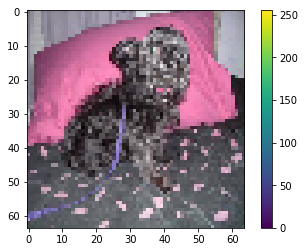

In [15]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

## Set the Training Set

### Set the Training label

In [8]:
#  The training label need no procession
training_labels = label;
print(training_labels)

[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

### Set training images

In [9]:
image

array(['train_1/train/dog.3091.jpg', 'train_1/train/dog.5973.jpg',
       'train_1/train/cat.4950.jpg', ..., 'train_1/train/dog.8104.jpg',
       'train_1/train/cat.2211.jpg', 'train_1/train/cat.792.jpg'],
      dtype='<U26')

In [125]:
SIZE_X =  192;
SIZE_Y =  192;

In [126]:
training_images = []
for i in range(len(image)):
    img = Image.open(image[i])
    img = img.resize((SIZE_X, SIZE_Y));
    img = np.array(img)
    if i % 1000 == 0:
        print("Proportion processed: ", i/len(image))
#     print(train_img)
    training_images.append(img )

Proportion processed:  0.0
Proportion processed:  0.05
Proportion processed:  0.1
Proportion processed:  0.15
Proportion processed:  0.2
Proportion processed:  0.25
Proportion processed:  0.3
Proportion processed:  0.35
Proportion processed:  0.4
Proportion processed:  0.45
Proportion processed:  0.5
Proportion processed:  0.55
Proportion processed:  0.6
Proportion processed:  0.65
Proportion processed:  0.7
Proportion processed:  0.75
Proportion processed:  0.8
Proportion processed:  0.85
Proportion processed:  0.9
Proportion processed:  0.95


In [127]:
training_images[1][0].shape

(192, 3)

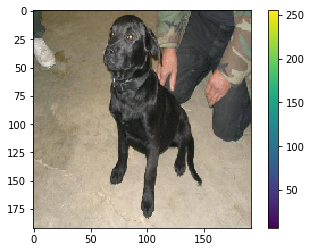

In [129]:
plt.figure()
plt.imshow(training_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [130]:
training_images = np.array(training_images)
training_images = training_images.reshape((len(training_images), SIZE_X, SIZE_Y, 3))

In [131]:
print(training_images.shape);

(20000, 192, 192, 3)


In [132]:
# Set the class name: label == 0 => cat; label == 1 => dog;
class_names = ["Cats", "Dogs"]

In [133]:
training_images = training_images / 255.0

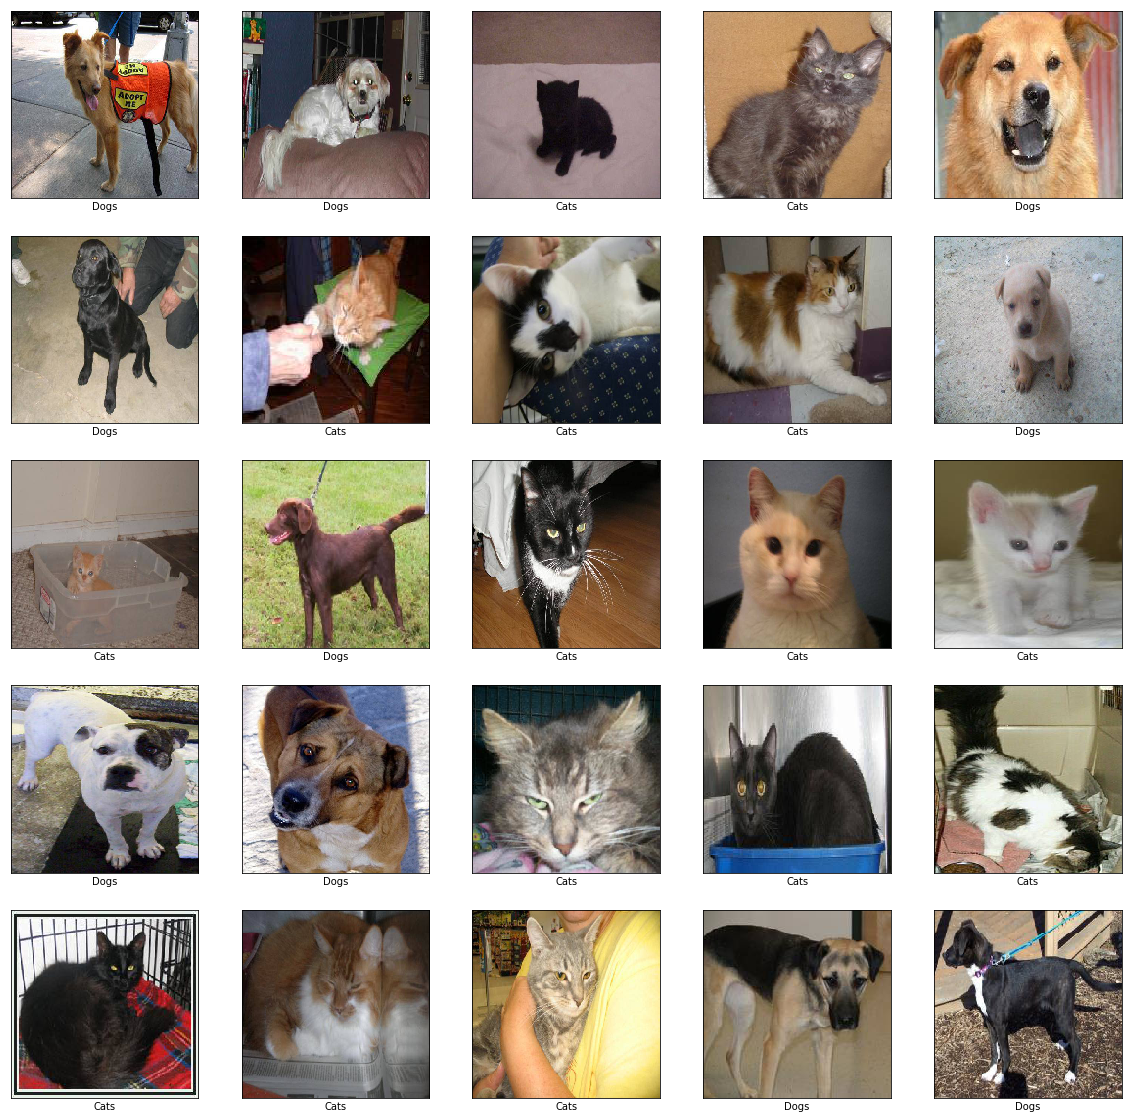

In [134]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

### Set the Test Set

In [135]:
test = get_test_files("test/test/")

In [136]:
len(test)

5000

In [137]:
image_name_dict = {}
for i in range(len(test)):
    img = Image.open(test[i])
    img = img.resize((SIZE_X, SIZE_Y));
    img = np.array(img)
    if i % 1000 == 0:
        print("Proportion processed: ", i/len(test))
#     print(train_img)
    image_name_dict[test[i]] = img

Proportion processed:  0.0
Proportion processed:  0.2
Proportion processed:  0.4
Proportion processed:  0.6
Proportion processed:  0.8


In [49]:
import re

In [152]:
test_images = [None for i in range(len(test))]
for key in image_name_dict.keys():
    k = int(re.findall( "\d+" , key)[0])
    print ( int(re.findall( "\d+" , key)[0]) )
    test_images [k] = image_name_dict[key];

0
1
10
100
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
101
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
102
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
103
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
104
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
105
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
106
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
107
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
108
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
109
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
11
110
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
111
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
112
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
113
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
114
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
115
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
116
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
117
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
118
1180
1181
1182

3374
3375
3376
3377
3378
3379
338
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
339
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
34
340
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
341
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
342
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
343
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
344
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
345
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
346
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
347
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
348
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
349
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
35
350
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
351
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
352
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
353
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
354
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
355
3550
3551
3552
3553
3554
3555
3556
3557
35

In [153]:
test_images

[array([[[155, 119, 119],
         [155, 119, 119],
         [155, 119, 119],
         ...,
         [122, 118, 107],
         [122, 118, 107],
         [122, 118, 107]],
 
        [[155, 119, 119],
         [155, 119, 119],
         [155, 119, 119],
         ...,
         [122, 118, 107],
         [122, 118, 107],
         [122, 118, 107]],
 
        [[155, 119, 119],
         [155, 119, 119],
         [155, 119, 119],
         ...,
         [122, 118, 107],
         [122, 118, 107],
         [122, 118, 107]],
 
        ...,
 
        [[153, 138, 143],
         [153, 138, 143],
         [153, 138, 143],
         ...,
         [144, 149, 153],
         [144, 149, 153],
         [144, 149, 153]],
 
        [[153, 138, 143],
         [153, 138, 143],
         [153, 138, 143],
         ...,
         [144, 149, 153],
         [144, 149, 153],
         [144, 149, 153]],
 
        [[153, 138, 143],
         [153, 138, 143],
         [153, 138, 143],
         ...,
         [144, 149, 153],
  

In [154]:
image_name_dict

{'test/test/0.jpg': array([[[155, 119, 119],
         [155, 119, 119],
         [155, 119, 119],
         ...,
         [122, 118, 107],
         [122, 118, 107],
         [122, 118, 107]],
 
        [[155, 119, 119],
         [155, 119, 119],
         [155, 119, 119],
         ...,
         [122, 118, 107],
         [122, 118, 107],
         [122, 118, 107]],
 
        [[155, 119, 119],
         [155, 119, 119],
         [155, 119, 119],
         ...,
         [122, 118, 107],
         [122, 118, 107],
         [122, 118, 107]],
 
        ...,
 
        [[153, 138, 143],
         [153, 138, 143],
         [153, 138, 143],
         ...,
         [144, 149, 153],
         [144, 149, 153],
         [144, 149, 153]],
 
        [[153, 138, 143],
         [153, 138, 143],
         [153, 138, 143],
         ...,
         [144, 149, 153],
         [144, 149, 153],
         [144, 149, 153]],
 
        [[153, 138, 143],
         [153, 138, 143],
         [153, 138, 143],
         ...,
         

In [156]:
test_images = np.array(test_images)
test_images = test_images.reshape((len(test_images), SIZE_X, SIZE_Y, 3))

In [157]:
test_images = test_images / 256

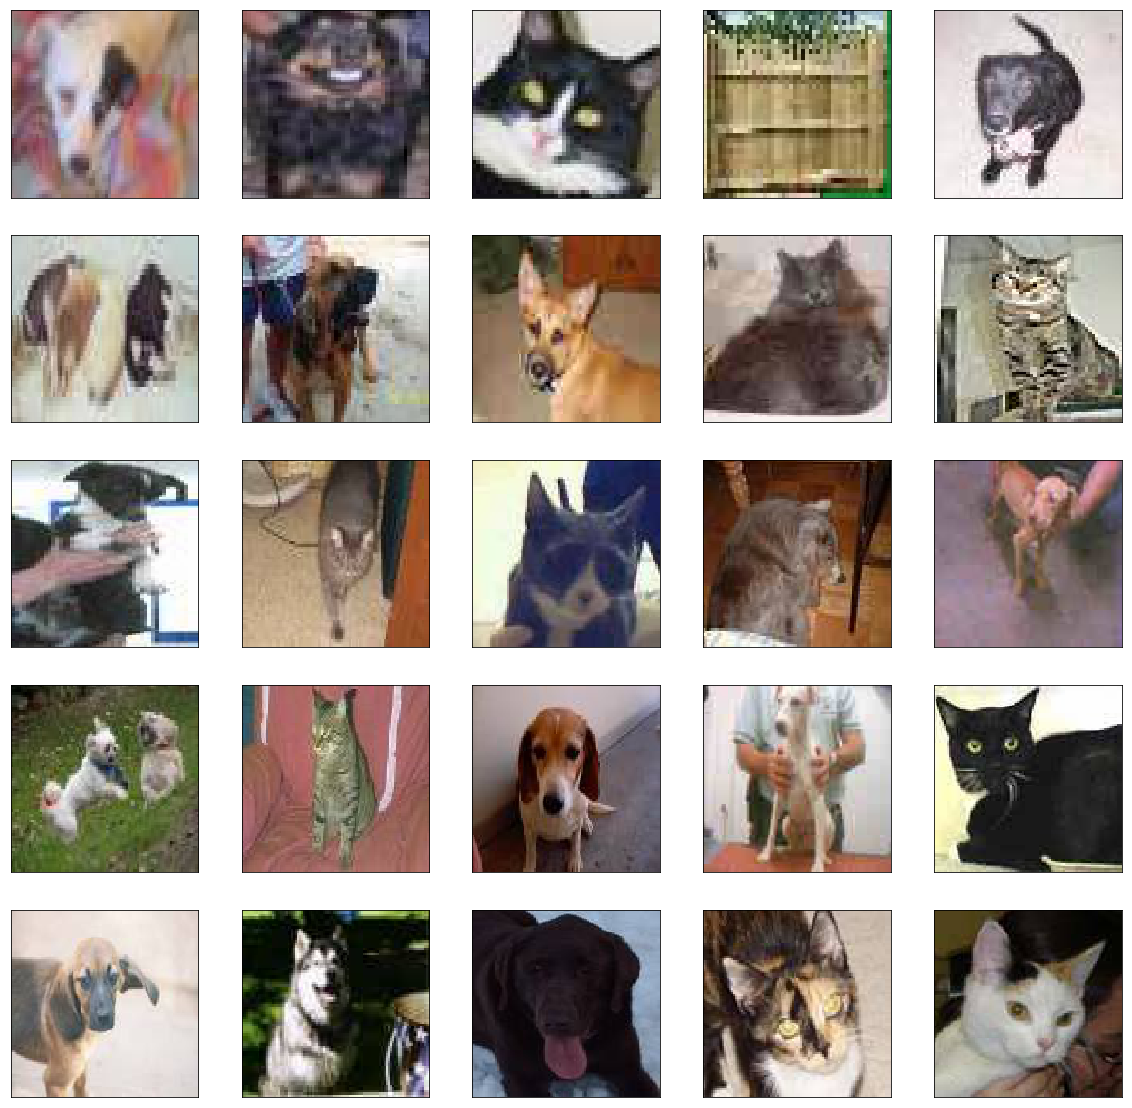

In [158]:
# Visualization
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[training_labels[i]])
plt.show()

## Building the Model

In [255]:
def training():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(SIZE_X, SIZE_Y, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(2, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr=0.001)
    
    
    model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(training_images, training_labels, shuffle = True ,batch_size = 64, epochs=6)
    
    return model

# Voting

In [238]:
len(test_images)

5000

In [250]:
def Vote_pack(n):
    register = [];
    for i in range(len(test_images)):
        register.append([i, 0, 0]);
    
    for time in range(n):
        print("Start the ", time + 1, " training:");
        print("---------------------------------------------------------------------------------")
        model = training();
        
        print("Start the ", time + 1, " predicting:");
        print("---------------------------------------------------------------------------------")
        predict = model.predict(test_images)
        
        print("Start the ", time + 1, " register:");
        print("---------------------------------------------------------------------------------")
        for i in range(len(predict)):
            register[i][1] += predict[i][0];
            register[i][2] += predict[i][1];
    return register

# Evaluate

In [258]:
register

[[0, 2.8928758800029755, 2.1071241199970245],
 [1, 2.4555981755256653, 2.5444017350673676],
 [2, 3.8867000937461853, 1.1132999388501048],
 [3, 3.888538420200348, 1.111461652442813],
 [4, 0.7151689466409152, 4.284831017255783],
 [5, 0.7990280203521252, 4.200972020626068],
 [6, 2.309616297483444, 2.690383791923523],
 [7, 1.3437337018549442, 3.656266212463379],
 [8, 4.9098222851753235, 0.09017762276926078],
 [9, 3.8486891984939575, 1.1513107884675264],
 [10, 2.9537903368473053, 2.0462096333503723],
 [11, 3.574184626340866, 1.4258152842521667],
 [12, 3.378154307603836, 1.6218456845090259],
 [13, 2.75202913582325, 2.247970849275589],
 [14, 1.954183891415596, 3.04581618309021],
 [15, 2.626977026462555, 2.3730230927467346],
 [16, 2.3792295679450035, 2.6207703575491905],
 [17, 1.0365504529327154, 3.9634495973587036],
 [18, 1.8949813842773438, 3.1050186157226562],
 [19, 4.908838748931885, 0.09116133362753231],
 [20, 2.99018831551075, 2.0098117142915726],
 [21, 2.451681323349476, 2.5483186244964

In [256]:
result = [];
register = Vote_pack(5)
for i in range(len(register)):
    if register[i][1] >= register[i][2]:
        result.append([i, 0]);
    else:
        result.append([i, 1]);

Start the  1  training:
---------------------------------------------------------------------------------
Epoch 1/6
20000/20000 [==============================] - 152s 8ms/sample - loss: 0.6587 - acc: 0.6158
Epoch 2/6
20000/20000 [==============================] - 140s 7ms/sample - loss: 0.5299 - acc: 0.7310
Epoch 3/6
20000/20000 [==============================] - 144s 7ms/sample - loss: 0.4027 - acc: 0.8123
Epoch 4/6
20000/20000 [==============================] - 132s 7ms/sample - loss: 0.2260 - acc: 0.9075
Epoch 5/6
20000/20000 [==============================] - 138s 7ms/sample - loss: 0.0867 - acc: 0.9685
Epoch 6/6
20000/20000 [==============================] - 141s 7ms/sample - loss: 0.0435 - acc: 0.9855
Start the  1  predicting:
---------------------------------------------------------------------------------
Start the  1  register:
---------------------------------------------------------------------------------
Start the  2  training:
--------------------------------------------

ResourceExhaustedError: OOM when allocating tensor with shape[64,64,190,190] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_20/Adam/gradients/MaxPool_42_grad/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:StatefulPartitionedCall]

In [259]:
for i in range(len(register)):
    if register[i][1] >= register[i][2]:
        result.append([i, 0]);
    else:
        result.append([i, 1]);

In [260]:
import pandas as pd
result_pd = pd.DataFrame(result)
result_pd.columns = [["id", "label"]]
result_pd.to_csv("Result_vote.csv", index = False);